# Word Cloud

In [49]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

## Display simple text

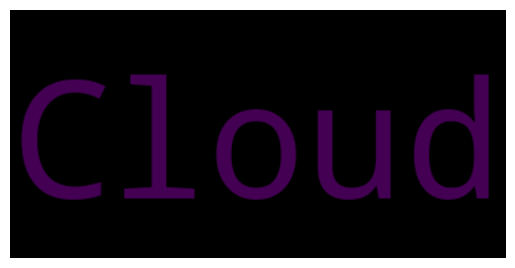

In [48]:
text = "Cloud"
wc = WordCloud().generate(text)

# Display image
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Add a simple mask

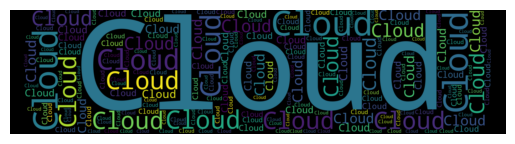

In [91]:
text = "Cloud"

# Generate a mask with numpy vector
total_row = 396
total_col = 1584
x, y = np.ogrid[:total_row, :total_col]

# Get center values
cen_x , cen_y = total_row/2 , total_col/2

# Get distance from center 
# mask = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)

mask = (x-cen_x) ** 2 + (y-cen_y) ** 2 > 750 ** 2
mask = 255 * mask.astype(int)

# Create word cloud
wc = WordCloud(background_color='black', repeat=True, mask=mask).generate(text)

# Display image
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
# Save image to folder
wc.to_file('c_mask_1.png')

In [38]:
# Add mask from external file
c_mask = np.array(Image.open('wine_mask.png'))
c_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [39]:
# Transform image
def transform_img(val):
    if val == 0:
        return 255
    else:
        return val

In [40]:
# Create mask from image
c_mask_transformed = np.ndarray((c_mask.shape[0], c_mask.shape[1]), np.int32)

for i in range(len(c_mask)):
    c_mask_transformed[i] = list(map(transform_img, c_mask[i]))

In [41]:
c_mask_transformed

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [50]:
# Get more text
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
m_text = open(path.join(d, 'pg1112.txt')).read()

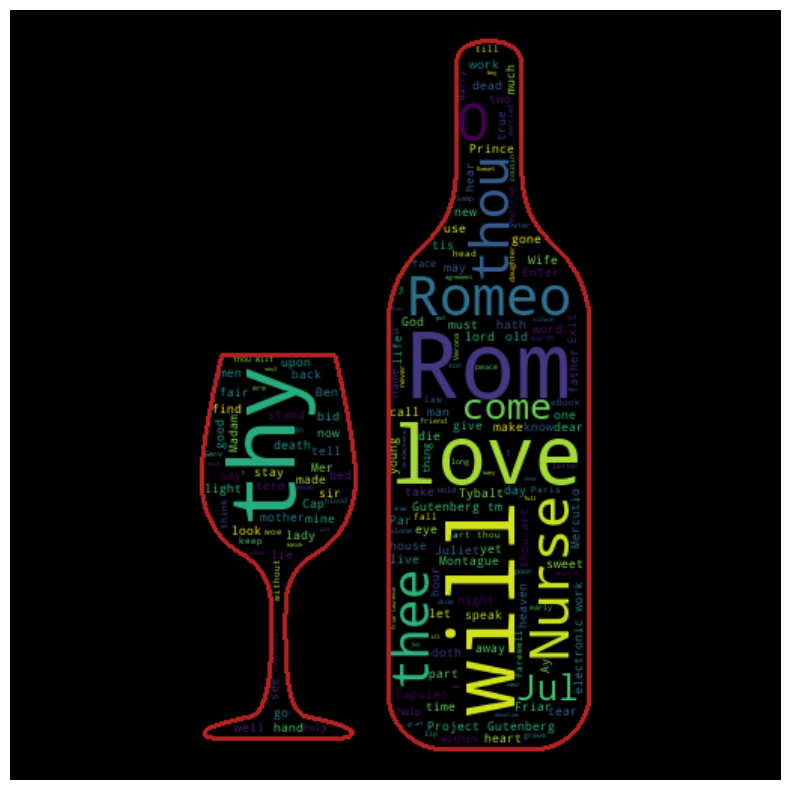

In [51]:
wc = WordCloud(background_color="black", max_words=1000, mask=c_mask_transformed, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(m_text)

# store to file
wc.to_file("cmask.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

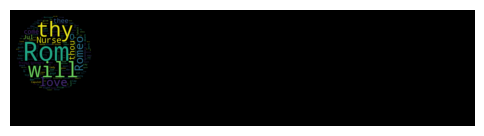

In [68]:
# Using color pattern
c_mask = np.array(Image.open('bannerln2.png'))
wc = WordCloud(background_color='black', mode='RGBA', max_words=2000, mask=mask)
wc.generate(m_text)

image_colors = ImageColorGenerator(c_mask)

# show
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(600*px,200*px))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
# Save output to file
wc.to_file('c_mask_2.png')